In [1]:
%cd ..

/home/rosneft_user_2500/anomaly-detection


In [2]:
import os.path
import sys
sys.path.insert(0, '/home/rosneft_user_2500/anomaly-detection')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from src.features.build_features import rolling_window

window_length = 64
prediction_len = 2

In [4]:
data = pd.read_csv('data/processed/TEP.csv', index_col='Index')
print(f'Len of dataset: {data.shape[0]}')

# Computed by DDRE model
ratios = np.load('TEP_ratios.npy')

Len of dataset: 120001


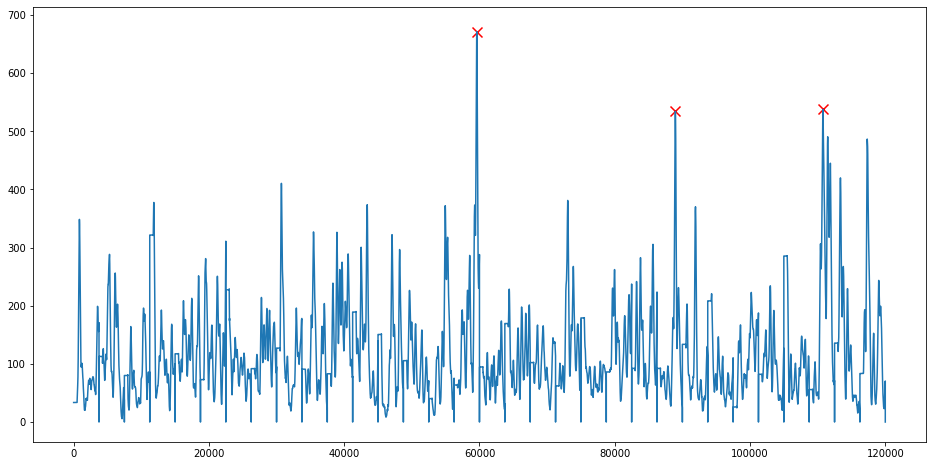

In [5]:
# 200 was used as window_width of DDRE model
peaks, _ = find_peaks(ratios, height=500, distance=200)

plt.figure(figsize=(16, 8))
plt.plot(ratios)
plt.scatter(peaks, ratios[peaks], marker='x', c='r', s=100)

У нас 3 сильно выраженных отклонения, поэтому поделим весь наш ряд на 4 части. И для каждой из частей запустим **LSTM** модель

In [9]:
from src.models.lstm import *
import keras

build_params = dict(
    input_length=window_length,
    input_shape=data.shape[1],
    lstm_layers_size=[32, 32],
    dropout_coeff=0.1,
    optimizer=keras.optimizers.Adam(lr=0.01),
    reg_strength=0.005,
)

batch_size = 64

fit_params = dict(
    epochs=10,
    verbose=1,
    callbacks=[keras.callbacks.ReduceLROnPlateau(patience=3),
               keras.callbacks.EarlyStopping(min_delta=0.01, patience=2)]
)

In [10]:
def fit_generator(X, y, batch_size=64):
    while True:
        idxs = np.random.randint(len(X), size=batch_size)
        yield np.take(X, idxs, axis=0), np.take(y, idxs, axis=0)


Piece 0...
Epoch 1/10
186/186 [==============================] - 230s 1s/step - loss: 0.5597


/home/rosneft_user_2500/anaconda3/envs/anom_det/lib/python3.7/site-packages/keras/callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/home/rosneft_user_2500/anaconda3/envs/anom_det/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/10
186/186 [==============================] - 232s 1s/step - loss: 0.4572
Epoch 3/10
186/186 [==============================] - 234s 1s/step - loss: 0.4347
Epoch 4/10
186/186 [==============================] - 234s 1s/step - loss: 0.4147
Epoch 5/10
186/186 [==============================] - 237s 1s/step - loss: 0.4060
Epoch 6/10
186/186 [==============================] - 232s 1s/step - loss: 0.4024
Epoch 7/10
186/186 [==============================] - 233s 1s/step - loss: 0.4005
Epoch 8/10
186/186 [==============================] - 231s 1s/step - loss: 0.3981
Epoch 9/10
186/186 [==============================] - 235s 1s/step - loss: 0.3943
Epoch 10/10
186/186 [==============================] - 236s 1s/step - loss: 0.3927


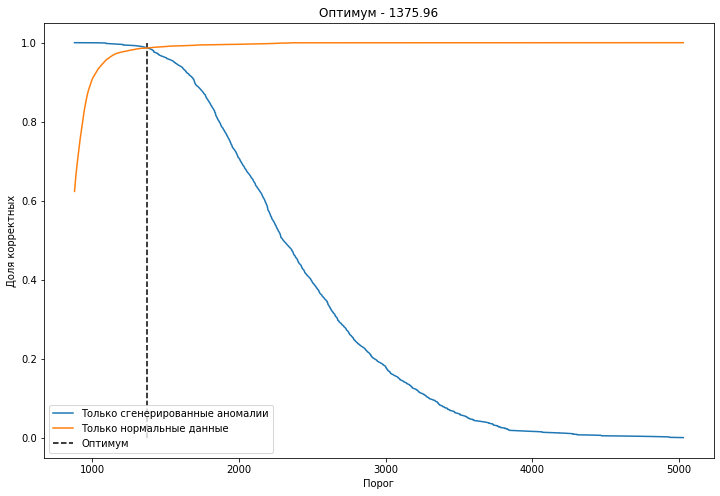

Piece 1...
Epoch 1/10
91/91 [==============================] - 81s 886ms/step - loss: 0.7366
Epoch 2/10


/home/rosneft_user_2500/anaconda3/envs/anom_det/lib/python3.7/site-packages/keras/callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/home/rosneft_user_2500/anaconda3/envs/anom_det/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


91/91 [==============================] - 78s 853ms/step - loss: 0.5518
Epoch 3/10
91/91 [==============================] - 77s 846ms/step - loss: 0.5681
Epoch 4/10
91/91 [==============================] - 78s 861ms/step - loss: 0.5325
Epoch 5/10
91/91 [==============================] - 79s 867ms/step - loss: 0.5241
Epoch 6/10
91/91 [==============================] - 77s 850ms/step - loss: 0.5206
Epoch 7/10
91/91 [==============================] - 77s 850ms/step - loss: 0.5329
Epoch 8/10
91/91 [==============================] - 77s 851ms/step - loss: 0.5053
Epoch 9/10
91/91 [==============================] - 80s 874ms/step - loss: 0.5382
Epoch 10/10
91/91 [==============================] - 77s 844ms/step - loss: 0.5381


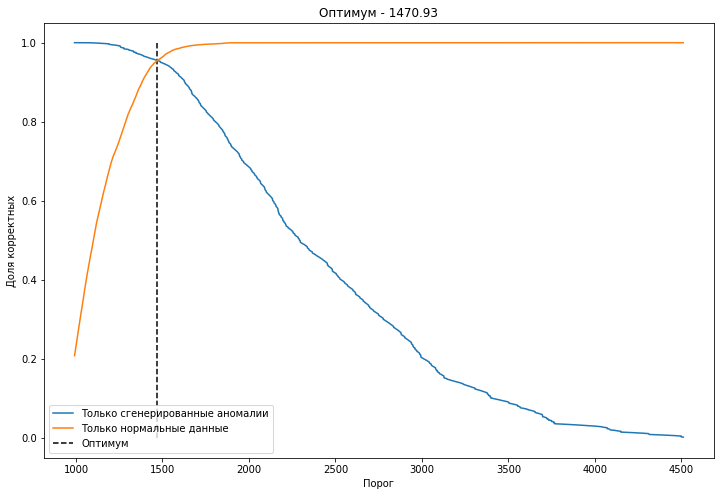

Piece 2...
Epoch 1/10
67/67 [==============================] - 55s 817ms/step - loss: 0.7303
Epoch 2/10


/home/rosneft_user_2500/anaconda3/envs/anom_det/lib/python3.7/site-packages/keras/callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/home/rosneft_user_2500/anaconda3/envs/anom_det/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


67/67 [==============================] - 47s 705ms/step - loss: 0.5455
Epoch 3/10
67/67 [==============================] - 49s 738ms/step - loss: 0.5231
Epoch 4/10
67/67 [==============================] - 49s 733ms/step - loss: 0.5123
Epoch 5/10
67/67 [==============================] - 51s 757ms/step - loss: 0.4941
Epoch 6/10
67/67 [==============================] - 50s 750ms/step - loss: 0.5400
Epoch 7/10
67/67 [==============================] - 52s 775ms/step - loss: 0.5161
Epoch 8/10
67/67 [==============================] - 50s 750ms/step - loss: 0.4758
Epoch 9/10
67/67 [==============================] - 51s 757ms/step - loss: 0.4919
Epoch 10/10
67/67 [==============================] - 52s 780ms/step - loss: 0.4773


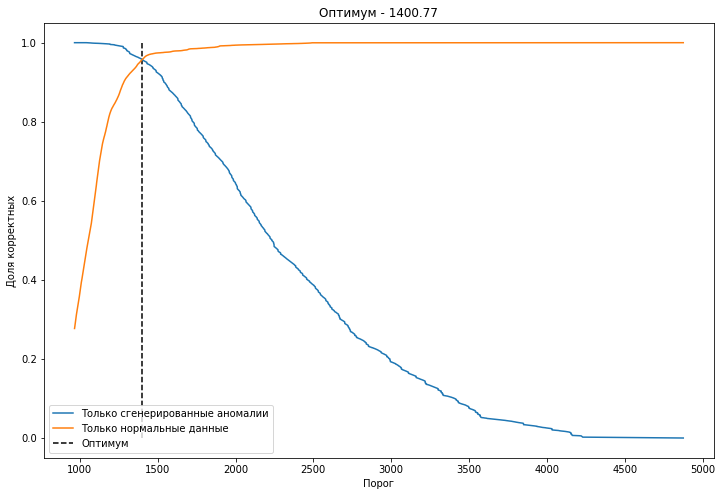

Piece 3...
Epoch 1/10
28/28 [==============================] - 23s 839ms/step - loss: 1.0266
Epoch 2/10


/home/rosneft_user_2500/anaconda3/envs/anom_det/lib/python3.7/site-packages/keras/callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/home/rosneft_user_2500/anaconda3/envs/anom_det/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


28/28 [==============================] - 18s 653ms/step - loss: 0.9338
Epoch 3/10
28/28 [==============================] - 18s 658ms/step - loss: 0.8693
Epoch 4/10
28/28 [==============================] - 17s 613ms/step - loss: 0.8509
Epoch 5/10
28/28 [==============================] - 18s 643ms/step - loss: 0.7671
Epoch 6/10
28/28 [==============================] - 18s 655ms/step - loss: 0.7375
Epoch 7/10
28/28 [==============================] - 17s 623ms/step - loss: 0.6908
Epoch 8/10
28/28 [==============================] - 18s 631ms/step - loss: 0.6693
Epoch 9/10
28/28 [==============================] - 18s 652ms/step - loss: 0.6876
Epoch 10/10
28/28 [==============================] - 18s 632ms/step - loss: 0.6935


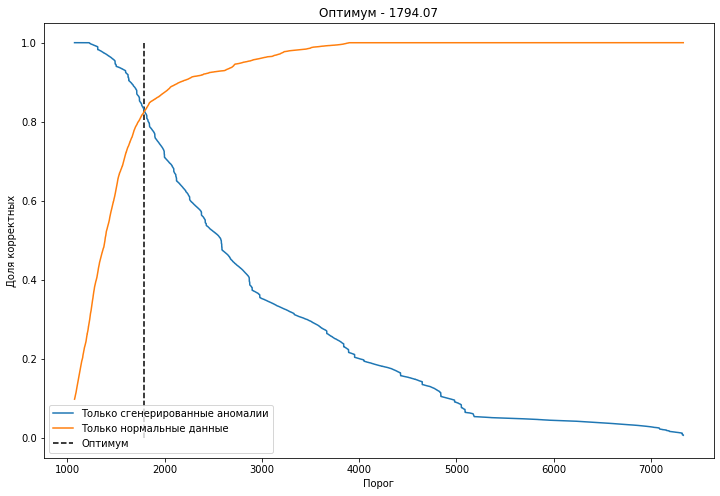

In [11]:
boundaries = np.concatenate(([0], peaks, [data.shape[0]]))
all_anom_start_idxs = []
for i, (left, right) in enumerate(zip(boundaries[:-1], boundaries[1:])):
    print(f'Piece {i}...')
    piece = data.iloc[left:right]
    X = rolling_window(piece, window_length, 0)[:-prediction_len]
    y = rolling_window(piece, window_length, prediction_len)
    
    model = lstm_model(**build_params)
    model.fit_generator(fit_generator(X, y, batch_size), **fit_params, steps_per_epoch=int(0.2 * len(X) / batch_size))
    
    tresh = find_optimal_tresh(model, X, y, piece.shape, window_length, prediction_len, True)
    start_idxs = find_anomaly(compute_diff(model, X, y), tresh)
    all_anom_start_idxs.extend(start_idxs + left)

In [13]:
np.save('all_anom_start_idxs_TEP.npy', all_anom_start_idxs)